# Bangaluru house price prediction

load dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data=pd.read_csv("E:AI &ML_datasets/ML_Datasets/Bengaluru_House_Data.csv")
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


### Data Cleaning

###### check null values

In [3]:
data.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [4]:
data.shape

(13320, 9)

In [5]:
data.nunique()

area_type          4
availability      81
location        1305
size              31
society         2688
total_sqft      2117
bath              19
balcony            4
price           1994
dtype: int64

######  drop society column due to high no of null values,
###### drop other records which contains null values,availability is unwanted

In [6]:
# drop society column due to high no of null values
#drop other records which contains null values,availability is unwanted
data.drop(columns=["society","availability"],inplace=True)
data.dropna(inplace=True)

In [7]:
data.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [8]:
#data.str.strip()

In [9]:
data.shape

(12710, 7)

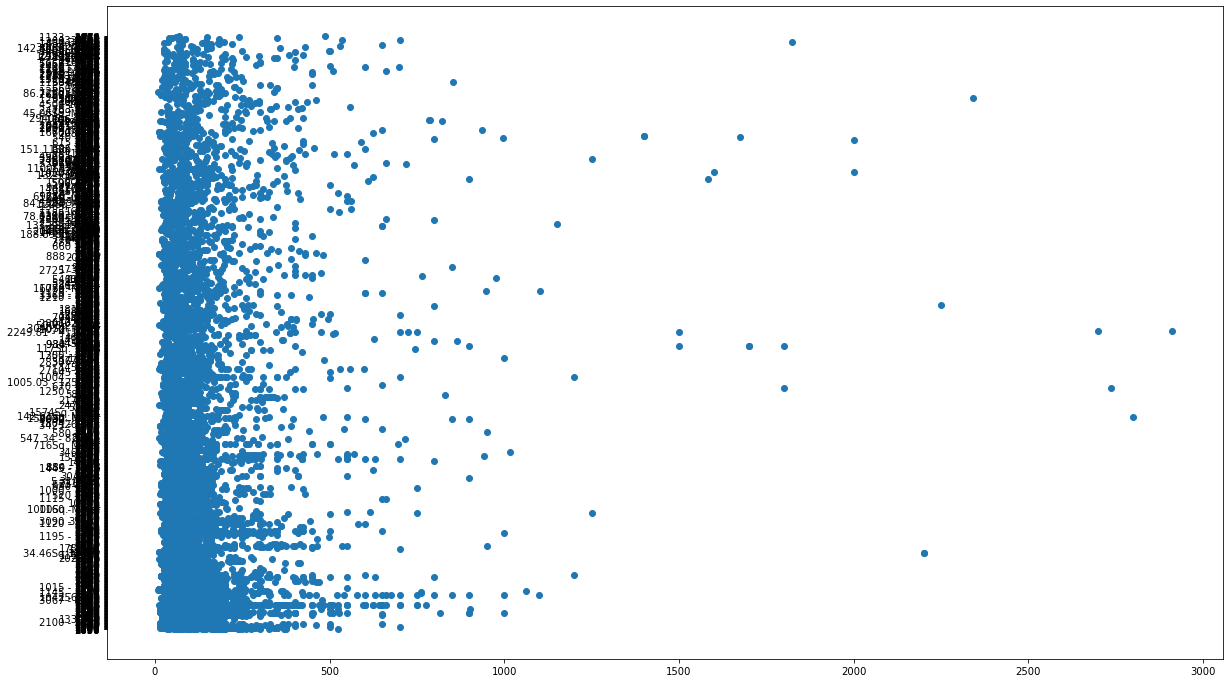

In [10]:
plt.figure(figsize=(20,12))
plt.scatter(data["price"],data["total_sqft"])
plt.show()

C:\Users\Mahendran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

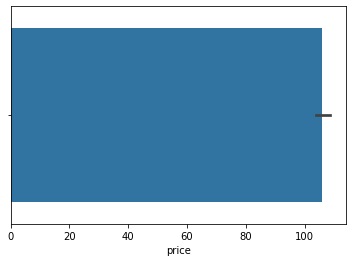

In [11]:
import seaborn as sns
sns.barplot(data["price"])

##### Remove Duplicates

In [12]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
13314    False
13315    False
13317    False
13318    False
13319     True
Length: 12710, dtype: bool

In [13]:
data.drop_duplicates(inplace=True)

checking column contains BHK as bedroom

In [14]:
data["size"].str.contains("Bedroom").value_counts()

False    9765
True     2260
Name: size, dtype: int64

### Feature Engineering

In [15]:
data["BHK"]=data["size"].str.split().str.get(0).astype("int")

In [16]:
def isfloat(x):
    try:
        float(x)
    except:
        return False
    return True


In [17]:
data[~data["total_sqft"].apply(isfloat)]["total_sqft"]

30       2100 - 2850
122      3067 - 8156
137      1042 - 1105
165      1145 - 1340
188      1015 - 1540
            ...     
12955    1437 - 1629
12975     850 - 1060
12990    1804 - 2273
13059    1200 - 1470
13265    1133 - 1384
Name: total_sqft, Length: 185, dtype: object

In [18]:
def convertize(x):
    y=x.split("-")
    if len(y)==2:
        return (float(y[0])+float(y[1]))/2
    try:
        return float(x)
    except:
        return None
    
data["total_sqft"]=data["total_sqft"].apply(convertize)
data.dropna(inplace=True)

In [19]:
data.head()

,area_type,location,size,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


In [20]:
data.describe()

,total_sqft,bath,balcony,price,BHK
count,11983.000000,11983.000000,11983.000000,11983.000000,11983.000000
mean,1523.780528,2.634649,1.585663,108.053964,2.753234
std,1189.323769,1.243460,0.824422,134.790640,1.223392
min,5.000000,1.000000,0.000000,8.000000,1.000000
25%,1100.000000,2.000000,1.000000,50.000000,2.000000
50%,1270.000000,2.000000,2.000000,70.000000,3.000000
75%,1650.000000,3.000000,2.000000,116.000000,3.000000
max,52272.000000,40.000000,3.000000,2912.000000,43.000000


### EDA analysis

In [21]:
data_=data.copy()

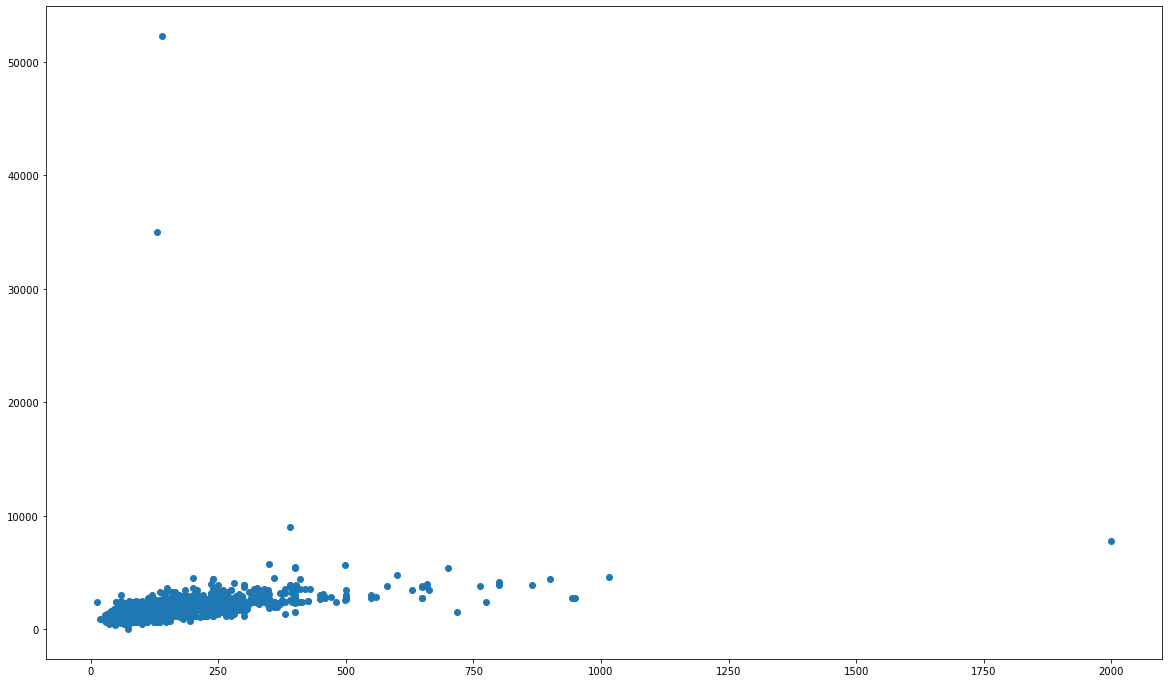

In [22]:
plt.figure(figsize=(20,12))
plt.scatter(data[data["BHK"]==3]["price"],data[data["BHK"]==3]["total_sqft"])
plt.show()

C:\Users\Mahendran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_sqft'>

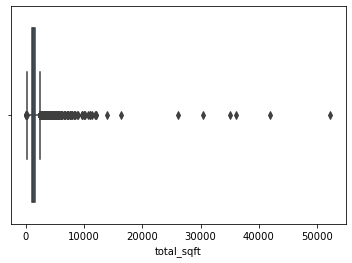

In [23]:
sns.boxplot(data["total_sqft"])

C:\Users\Mahendran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price', ylabel='total_sqft'>

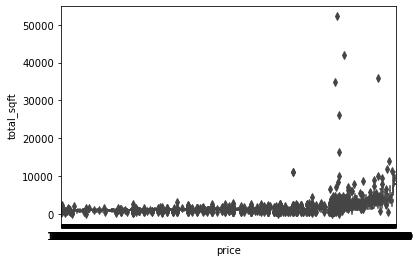

In [24]:
sns.boxplot(data["price"],data["total_sqft"])

C:\Users\Mahendran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BHK', ylabel='bath'>

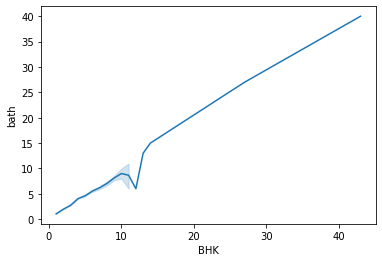

In [25]:
sns.lineplot(data["BHK"],data["bath"])

C:\Users\Mahendran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bath'>

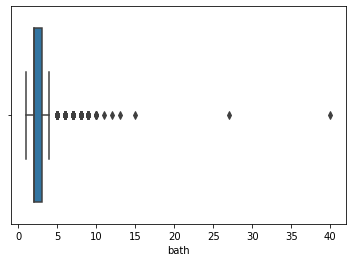

In [26]:
sns.boxplot(data["bath"])

C:\Users\Mahendran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BHK'>

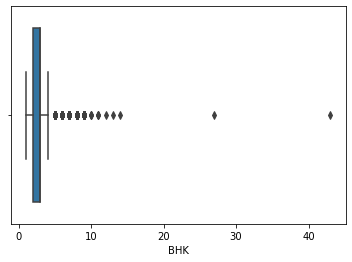

In [27]:
sns.boxplot(data["BHK"])

### Future Engineering

In [28]:
data["price_bhk"]=data.price/data.BHK

In [29]:
 data["sqk_bhk"]=data.total_sqft/data.BHK
data.shape

(11983, 10)

In [30]:
data["price_sqft"]=data.price*10000/data.total_sqft

### Removing Outliers

In [31]:
data[((data["total_sqft"]/data["BHK"])<300)]

,area_type,location,size,total_sqft,bath,balcony,price,BHK,price_bhk,sqk_bhk,price_sqft
58,Plot Area,Murugeshpalya,6 Bedroom,1407.0,4.0,1.0,150.0,6,25.000000,234.500000,1066.098081
68,Plot Area,Devarachikkanahalli,8 Bedroom,1350.0,7.0,0.0,85.0,8,10.625000,168.750000,629.629630
70,Plot Area,Double Road,3 Bedroom,500.0,3.0,2.0,100.0,3,33.333333,166.666667,2000.000000
78,Built-up Area,Kaval Byrasandra,2 BHK,460.0,1.0,0.0,22.0,2,11.000000,230.000000,478.260870
89,Plot Area,Rajaji Nagar,6 Bedroom,710.0,6.0,3.0,160.0,6,26.666667,118.333333,2253.521127
...,...,...,...,...,...,...,...,...,...,...,...
13216,Super built-up Area,Tilak Nagar,1 BHK,250.0,2.0,2.0,40.0,1,40.000000,250.000000,1600.000000
13219,Plot Area,Laggere,7 Bedroom,1590.0,9.0,3.0,132.0,7,18.857143,227.142857,830.188679
13221,Plot Area,T Dasarahalli,9 Bedroom,1178.0,9.0,1.0,75.0,9,8.333333,130.888889,636.672326
13281,Plot Area,Margondanahalli,5 Bedroom,1375.0,5.0,1.0,125.0,5,25.000000,275.000000,909.090909


###### removing outliers by business rule

In [32]:
data1=data[~((data["total_sqft"]/data["BHK"])<300)]

###### removing outliers by interquantile rule

In [33]:
q1=data1["total_sqft"].quantile(0.25)
q3=data1["total_sqft"].quantile(0.75)
iq=q3-q1
data1=data1[~((data1["total_sqft"]<(data1["total_sqft"].mean()-1.5*q1))|(data1["total_sqft"]>(data1["total_sqft"].mean()+1.5*q3)))]
data1.shape

(11133, 11)

q1=data1["sqk_bhk"].quantile(0.25)
q3=data1["sqk_bhk"].quantile(0.75)
iq=q3-q1
data1=data1[~((data1["sqk_bhk"]<(data1["sqk_bhk"].mean()-1.5*q1))|(data1["sqk_bhk"]>(data1["sqk_bhk"].mean()+1.5*q3)))]
data1.shape

In [34]:
q1=data1["price"].quantile(0.25)
q3=data1["price"].quantile(0.75)
iq=q3-q1
data1=data1[~((data1["price"]<(data1["price"].mean()-1.5*q1))|(data1["price"]>(data1["price"].mean()+1.5*q3)))]
data1.shape

(10341, 11)

In [35]:
q1=data1["price_bhk"].quantile(0.25)
q3=data1["price_bhk"].quantile(0.75)
iq=q3-q1
data1=data1[~((data1["price_bhk"]<(data1["price_bhk"].mean()-1.5*q1))|(data1["price_bhk"]>(data1["price_bhk"].mean()+1.5*q3)))]
data1.shape

(10286, 11)

C:\Users\Mahendran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_sqft'>

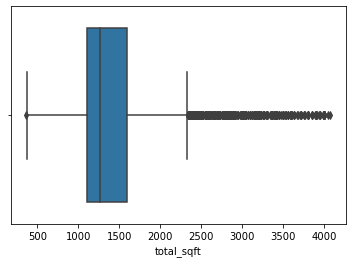

In [36]:
sns.boxplot(data1["total_sqft"])

In [37]:
data1.shape,data.shape

((10286, 11), (11983, 11))

##### removing outliers by mean and standard deviation using price per squarefeet future

In [38]:
def removePpsOutliers(df):
    df_out = pd.DataFrame()
    
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_sqft)
        st = np.std(subdf.price_sqft)
        
        reduced_df = subdf[(subdf.price_sqft > (m-st)) & (subdf.price_sqft <= (m+st))]
        df_out = pd.concat([df_out,reduced_df], ignore_index=True)
    
    return df_out

In [39]:
dataa=removePpsOutliers(data1)

##### removing outliers by the case that in same location, big house price is equal to or less than the small house price

In [40]:
def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    for location, location_df in df.groupby('location'):
        bhk_sats={}
        for BHK,BHK_df in location_df.groupby('BHK'):
            bhk_sats[BHK]={
                'mean':np.mean(BHK_df.price_sqft),
                'std':np.std(BHK_df.price_sqft),
                'count':BHK_df.shape[0]
            }
        for BHK,BHK_df in location_df.groupby('BHK'):
            stats=bhk_sats.get(BHK-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,BHK_df[BHK_df.price_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

data2=remove_bhk_outliers(dataa)
data2.shape

(5812, 11)

In [41]:
data3=data2[data2["bath"]<data2["BHK"]+2]# removing outliers by bathroom future

In [42]:
data3.shape

(5783, 11)

In [43]:

data4=data3[~((data3["total_sqft"]>2000.0) & (data3["price"]<75.0))]

In [44]:
data4=data4[~((data4["total_sqft"]<1500.0) & (data4["price"]>150.0))]

In [45]:
data4=data4[~((data4["total_sqft"]<2000.0) & (data4["price"]>225.0))]

In [46]:
data4.shape

(5746, 11)

In [47]:
data4=data4[~((data4["total_sqft"]<700.0) & (data4["price"]>70.0))]

C:\Users\Mahendran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


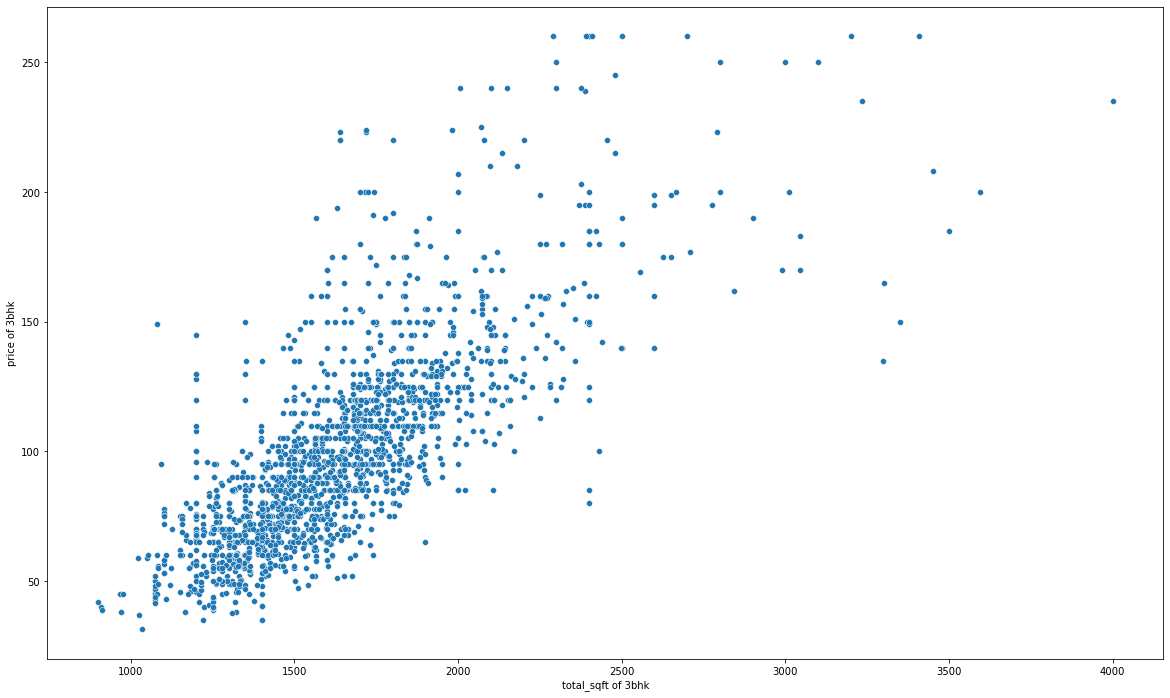

In [82]:
plt.figure(figsize=(20,12))
sns.scatterplot(data4[data4["BHK"]==3]["total_sqft"],data4[data4["BHK"]==3]["price"])
plt.xlabel("total_sqft of 3bhk")
plt.ylabel("price of 3bhk")
plt.show()

C:\Users\Mahendran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


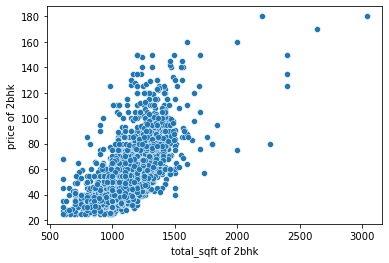

In [83]:
#plt.figure(figsize=(20,12))
sns.scatterplot(data4[data4["BHK"]==2]["total_sqft"],data4[data4["BHK"]==2]["price"])
plt.xlabel("total_sqft of 2bhk")
plt.ylabel("price of 2bhk")
plt.show()

#### splitting denpendent and indepenent futures

In [50]:
x=data4.drop(columns=["size","price_bhk","sqk_bhk","balcony","area_type","price"])
y=data4["price"]
x.head()

,location,total_sqft,bath,BHK,price_sqft
0,Devarabeesana Halli,1672.0,3.0,3,897.129187
1,Devarabeesana Halli,1750.0,3.0,3,851.428571
2,Devarabeesana Halli,1750.0,3.0,3,857.142857
4,Devarachikkanahalli,1250.0,2.0,2,320.000000
5,Devarachikkanahalli,1200.0,2.0,2,691.666667


In [51]:
others=x["location"].value_counts()
others=others[others<10]
x["location"]=x["location"].apply(lambda x: "other" if x in others else x)
x["location"]=x["location"].str.strip()
x.head()

,location,total_sqft,bath,BHK,price_sqft
0,other,1672.0,3.0,3,897.129187
1,other,1750.0,3.0,3,851.428571
2,other,1750.0,3.0,3,857.142857
4,Devarachikkanahalli,1250.0,2.0,2,320.000000
5,Devarachikkanahalli,1200.0,2.0,2,691.666667


getting dummy variables for location column

In [52]:
loc=pd.get_dummies(x["location"])
x1=pd.concat([x,loc],axis=1)
x1.drop(columns=["location","other"],inplace=True)
x1.head()

,total_sqft,bath,BHK,price_sqft,1st Phase JP Nagar,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,1672.0,3.0,3,897.129187,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1750.0,3.0,3,851.428571,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1750.0,3.0,3,857.142857,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1250.0,2.0,2,320.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1200.0,2.0,2,691.666667,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
x1.drop(columns="price_sqft",inplace=True)

In [54]:
x2=x1.copy()

In [55]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x2["total_sqft"]=sc.fit_transform(x1[["total_sqft"]])
x2["bath"]=sc.fit_transform(x1[["bath"]])
x2["BHK"]=sc.fit_transform(x1[["BHK"]])

##### splitting datasets for training and testing

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.2,random_state=42)

# Model Building

### LinearRegression

In [57]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import r2_score
lr1=LinearRegression(normalize=True)
lr1.fit(x_train,y_train)
pred=lr1.predict(x_test)
lr1.score(x_test,y_test)

0.8287478645646552

In [58]:
r2_score(y_test,pred)

0.8287478645646552

In [59]:
lr1.score(x_train,y_train)

0.8056810743230325

In [60]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,pred))

16.820753111080993

In [61]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=15,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),x1,y,cv=cv).mean()


0.8034261295578035

### Lasso Model

In [62]:
l1=Lasso(alpha=0.001,normalize=True)
l1.fit(x_train,y_train)
pred1=lr1.predict(x_test)
l1.score(x_test,y_test)

0.8289695655082494

### Ridge

In [63]:
l1=Ridge(alpha=0.001,normalize=True)
l1.fit(x_train,y_train)
pred1=lr1.predict(x_test)
l1.score(x_test,y_test)

0.8287832603147729

##### prediction

In [64]:

def price_predict(location,sqft,bath,BHK):
    loc_index=np.where(x1.columns==location)[0][0]
    print(loc_index)
    x=np.zeros(len(x1.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=BHK
    if loc_index >=0:
        x[loc_index]=1
   
    return lr1.predict([x])

In [65]:
data.loc[7761]

area_type     Super built-up  Area
location                 Gottigere
size                         2 BHK
total_sqft                  1120.0
bath                           2.0
balcony                        2.0
price                         50.0
BHK                              2
price_bhk                     25.0
sqk_bhk                      560.0
price_sqft              446.428571
Name: 7761, dtype: object

In [66]:
price_predict("Gottigere",1120.0,2.0,2)


56


array([44.27945309])

In [67]:
x_test.head()

,total_sqft,bath,BHK,1st Phase JP Nagar,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,Abbigere,...,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur
866,1280.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3989,1033.0,2.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6583,1405.0,2.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6740,1200.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5933,2254.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
pred

array([ 71.08941376,  55.48679699,  84.02881793, ..., 171.45930621,
        53.64346767,  40.60572727])

In [69]:
y_test

866      60.16
3989     31.50
6583     78.00
6740     67.77
5933    153.00
         ...  
4252     49.50
764     147.00
1510    105.00
5166     42.04
1469     36.00
Name: price, Length: 1149, dtype: float64

In [70]:
x1.shape

(5743, 159)

In [71]:
x1.columns[70]

'Hoodi'

In [72]:
from sklearn.svm import SVR

### SVM

In [73]:
svr=SVR(kernel='rbf')
svr.fit(x_train,y_train)
svr.score(x_test,y_test)

0.7255114531318987

### RandomForest

In [74]:
from sklearn.ensemble import RandomForestRegressor
rr=RandomForestRegressor(n_estimators=50)
rr.fit(x_train,y_train)
rr.score(x_test,y_test)


0.790840019550889

### DecisionTree

In [75]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
dt.score(x_test,y_test)

0.7087729812763564

### KNeighbors

In [76]:
from sklearn.neighbors import KNeighborsRegressor
kr=KNeighborsRegressor()
kr.fit(x_train,y_train)
kr.score(x_test,y_test)

0.7260530007771389

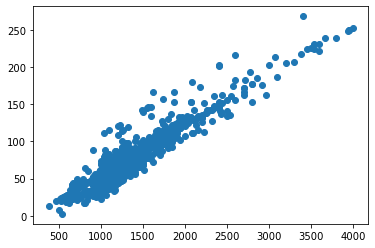

In [77]:
plt.scatter(x_test["total_sqft"],pred)

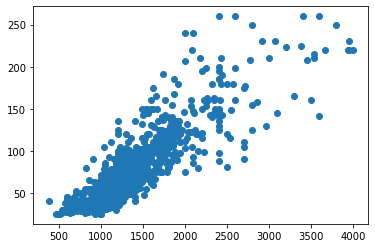

In [78]:
plt.scatter(x_test["total_sqft"],y_test)

#### Atlast accuracy given by models are
##### KNeighbors       :72.60530007771389 %
##### DecisionTree     :69.63842294636255 %
##### RandomForest     :79.61157090479727 %
##### SVM              :72.55114531318987 %
##### Ridge            :82.87832603147729 %
##### Lasso            :82.89695655082494 %
##### Linear Regression:82.87478645646552 %

### Conclusion Lasso Gives High accuracy than other models